# Лабораторная работа 0

Рассмотрим датасет https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset

Задача - научиться предсказывать, продолжит ли школьник (американский) учебу в колледже или нет.

Если мы будем знать, что человек не будет учиться дальше, то преподавателям и психологам следует поговорить с ним, помочь найти себя и определиться с будущими действиями. С помощью машинного обучения мы хотим выявлять учеников, которым нужна такая помощь.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [4]:
df.shape

(1000, 11)

### Описание датасета

**type_school** - тип школы, в которую ходит ученик  
**school_accreditation** - аккредитация школы (A / B)  
**gender** - пол ученика  
**interest** - заинтересованность в учебе  
**residence** - место проживания (город / пригород)  
**parent_age** - возраст родителей  
**parent_salary** - зарплата родителей  
**house_area** - площадь родительского дома  
**average_grades** - средний балл (от 0 до 100)  
**parent_was_in_college** - учились ли родители в колледже  
**in_college** - пошел ли ученик в колледж - *таргет*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [6]:
df.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
in_college               0
dtype: int64

В датасете нет пропусков, все типы данных выбраны корректно. Можно приступать к анализу

### Распределение фичей

In [7]:
import matplotlib.pyplot as plt

Посмотрим на распределение количественных фичей

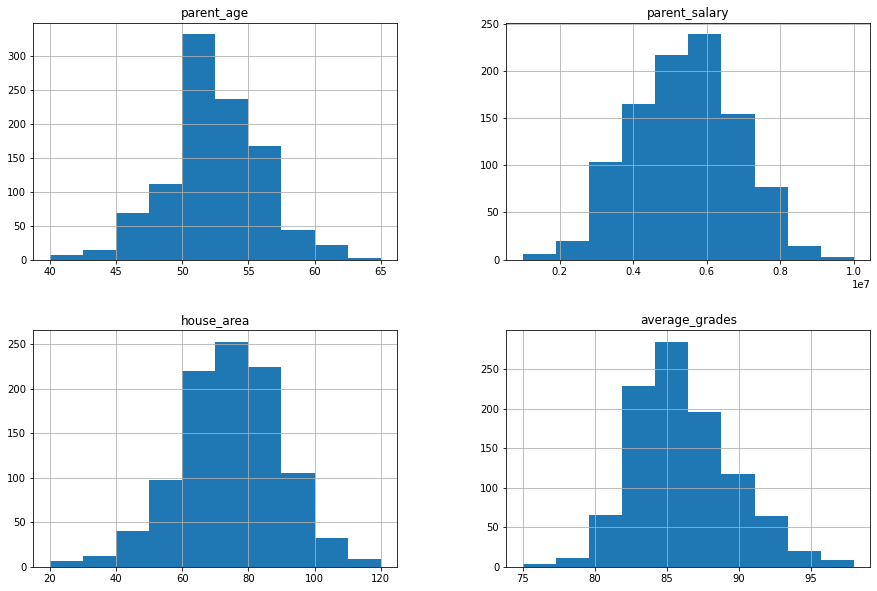

In [8]:
numerical = ['parent_age', 'parent_salary', 'house_area', 'average_grades']
df[numerical].hist(figsize=(15, 10));

Видим, что количественные фичи имеют нормальное распределение. Когда будем обучать модели, имеет смысл привести эти распределения к стандартным нормальным со средним 0 и стандартным отклонением 1.  
Интересное наблюдение: в выборке нет учеников со средним баллом ниже 75. Значит все учатся довольно хорошо.

Теперь рассмотрим категориальные признаки.

In [9]:
categorical = ['type_school', 'school_accreditation', 'gender', 'interest', 'residence', 'parent_was_in_college']
target = 'in_college'

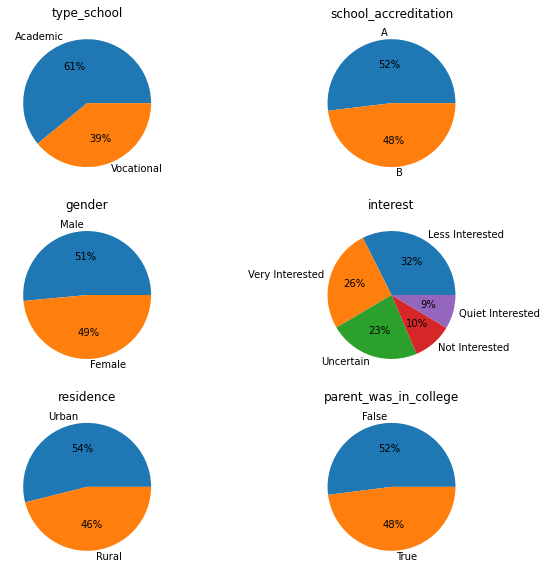

In [10]:
plt.figure(figsize=(10, 10))

for i in range(0, len(categorical), 2):
    plt.subplot(3, 2, i+1)
    plt.pie(x=df[categorical[i]].value_counts(), labels=df[categorical[i]].unique(), autopct='%.0f%%')
    plt.title(str(categorical[i]))
    plt.subplot(3, 2, i+2)
    plt.pie(x=df[categorical[i+1]].value_counts(), labels=df[categorical[i+1]].unique(), autopct='%.0f%%')
    plt.title(str(categorical[i+1]))

plt.show()

Большинство учеников не сильно заинтересовано в учебе (32+10=42%).  
35% учеников заинтересованы в продолжении обучения (26% - сильно заинтересованы, 9% - более-менее заинтересованы).  
23% пока не определились.

Посмотрим на сбалансированность классов.

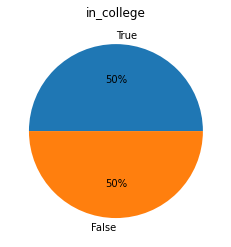

In [11]:
plt.pie(x=df[target].value_counts(), labels=df[target].unique(), autopct='%.0f%%')
plt.title(str(target))
plt.show()

Классы сбалансированы, значит веса при обучении использовать не придется.

### Корреляция
Построим корреляционную матрицу для численных признаков.

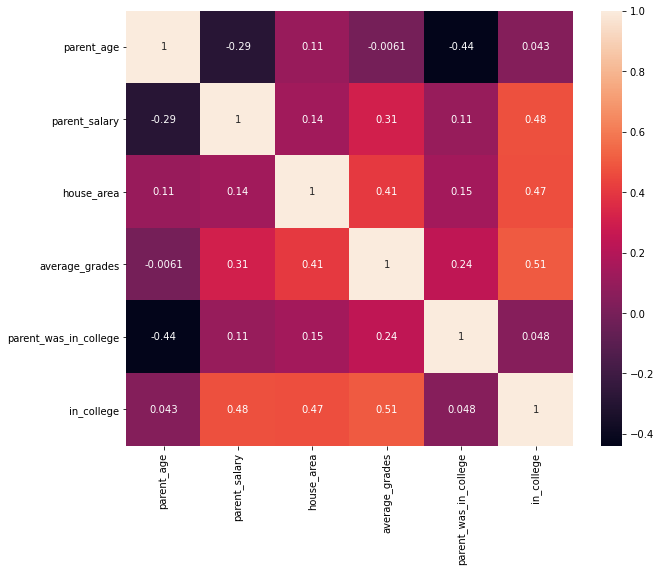

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

Зарплата родителей, площадь дома и средний балл ученика хорошо коррелируют с таргетом. В датасете нет линейно зависимых фичей, поэтому выкидывать ничего не будем.

Интересное наблюдение: сильнее всего коррелируют между собой фичи 'parent_age' и 'parent_was_in_college'. Но только на основе корреляции мы не можем строить причинно-следственные связи.

### Вывод

Мы рассмотрели датасет 'Go to college' и провели его анализ.

Выяснили, что:
1. В датасете нет пропущенных данных  
2. Все количественные фичи имеют нормальное распределение  
3. Категориальные фичи распределены более-менее равномерно  
4. Классы сбалансированы  
5. В датасете нет линейно зависимых фичей  
6. Таргет хорошо коррелирует с несколькими количественными фичами.

Датасет готов к дальнейшей работе.